<a href="https://colab.research.google.com/github/wiggapony0925/MNIST-Dataset-/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Handwritten Digit Classification Dataset
- The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

- It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

- 
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

# how I made and woked this project

- a main part of my learning on this topic was out of curisoity from youtube videos as I explored the world of Deep learning.

In this project, I experimented with building a simple neural network from scratch to gain a deeper understanding of how these models function, particularly in the context of training with the MNIST dataset. MNIST is a well-known dataset comprised of handwritten digits, often used for image classification tasks. It's an ideal dataset for testing basic machine learning algorithms due to its simplicity and the structured nature of the data, making it a great starting point for neural network training.
I first explored how to use vectors and weights to make predictions and iteratively reduce prediction errors through gradient descent. By updating the weights and biases, I applied the core principles behind backpropagation to ensure that the network could learn effectively. I trained the network on input data, adjusting parameters using error calculations, while leveraging sigmoid activation functions to introduce non-linearity into the model.
Throughout my trials, I focused on grasping the mathematical underpinnings of error reduction and parameter optimization. I applied this to the classification of MNIST digits by training the neural network to minimize the Mean Squared Error (MSE) between the predicted and actual target values.
This hands-on approach provided me with a solid understanding of how basic neural networks operate and how the MNIST dataset can be used to evaluate performance. Ultimately, the work lays the groundwork for further exploration into more complex architectures and datasets.







In [4]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

#Neural Networks & and how they work
---
A neural network is a system that learns how to make predictions by following these steps:

Taking the input data
Making a prediction
Comparing the prediction to the desired output
Adjusting its internal state to predict correctly the next time
Vectors, layers, and linear regression are some of the building blocks of neural networks. The data is stored as vectors, and with Python you store these vectors in arrays. Each layer transforms the data that comes from the previous layer. You can think of each layer as a feature engineering step, because each layer extracts some representation of the data that came previously.

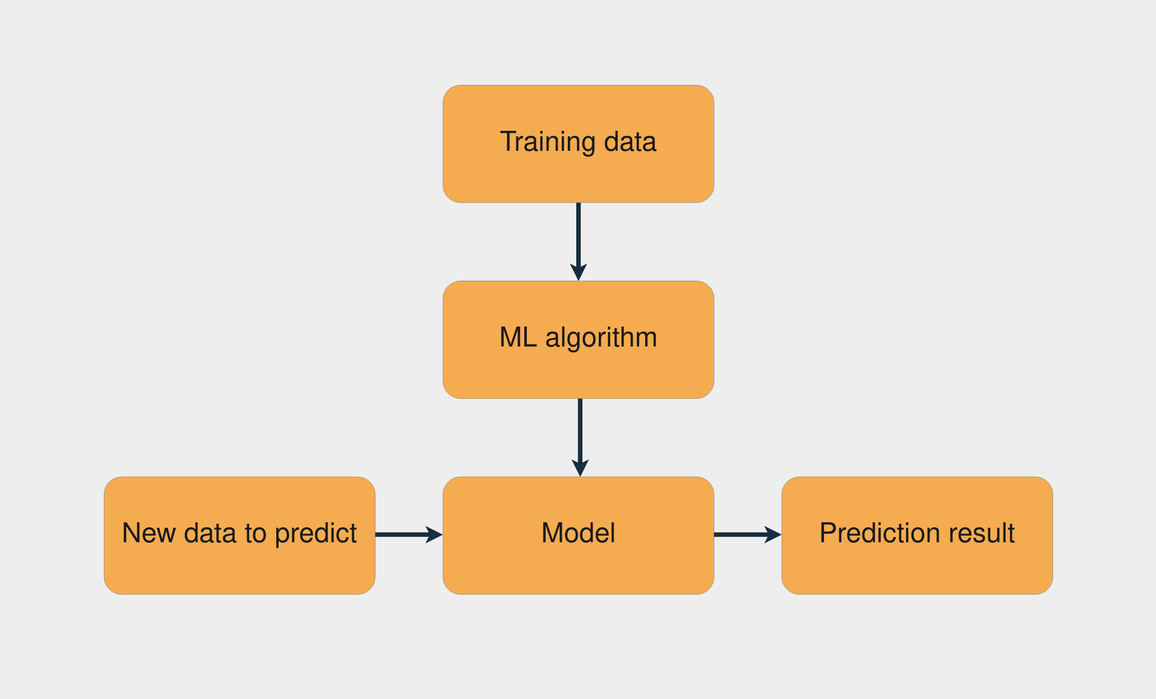





# Process To Train Neural Networks
- Training a neural network is similar to the process of trial and error. Imagine you’re playing darts for the first time. In your first throw, you try to hit the central point of the dartboard. Usually, the first shot is just to get a sense of how the height and speed of your hand affect the result. If you see the dart is higher than the central point, then you adjust your hand to throw it a little lower, and so on.

- With neural networks, the process is very similar: you start with some random weights and bias vectors, make a prediction, compare it to the desired output, and adjust the vectors to predict more accurately the next time. The process continues until the difference between the prediction and the correct targets is minimal.

- Knowing when to stop the training and what accuracy target to set is an important aspect of training neural networks, mainly because of overfitting and underfitting scenarios.

In [14]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

#math 
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

print(f"The dot product is: {dot_product_1}")

#example of computing for dot product to compare similarity of the input vectors 



The dot product is: 2.1672


# Using Numpy to compute

In [15]:
import numpy as np 

In [16]:
#Product One
dot_product_1 = np.dot(input_vector, weights_1)
print(f"Prduct: {dot_product_1}")

Prduct: 2.1672


In [18]:
#Product Two 
dot_product_2 = np.dot(input_vector, weights_2)

print(f"Product {dot_product_2}")

Product 4.1259999999999994


As a different way of thinking about the dot product, you can treat the similarity between the vector coordinates as an on-off switch. If the multiplication result is 0, then you’ll say that the coordinates are not similar. If the result is something other than 0, then you’ll say that they are similar.

This way, you can view the dot product as a loose measurement of similarity between the vectors. Every time the multiplication result is 0, the final dot product will have a lower result. Getting back to the vectors of the example, since the dot product of input_vector and weights_2 is 4.1259, and 4.1259 is greater than 2.1672, it means that input_vector is more similar to weights_2. You’ll use this same mechanism in your neural network.


---
# Training Models To Make Predictions 


---



# Two layered network with input of 0 and 1 

- linear operations 
- activation functions 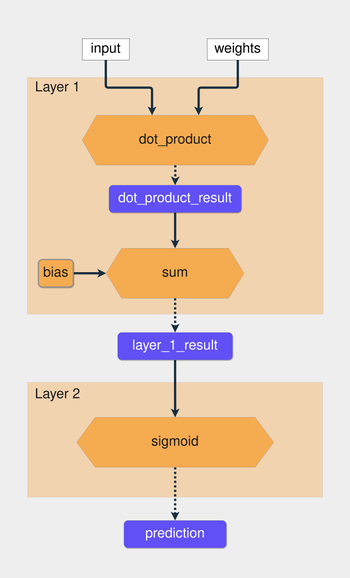

In [24]:
#vectors into numpy arrays 

input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x): 
  return 1/ (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
  layer_1 = np.dot(input_vector, weights) + bias 
  layer_2 = sigmoid(layer_1)
  return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"prediction: {prediction}")

#is prediction over 0.5
if prediction > 0.5: 
  print("prediction = 1")
else:
  print("prediction = 0")

prediction: [0.7985731]
prediction = 1


#lets now change the input vector 


In [25]:
# This is formatted as code
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(prediction)


[0.87101915]


#training Neural Network

---
In the process of training the neural network, you first assess the error and then adjust the weights accordingly. To adjust the weights, you’ll use the gradient descent and backpropagation algorithms. Gradient descent is applied to find the direction and the rate to update the parameters.



In [28]:
target = 0 
mse = np.square(prediction - target)

print(f"predction {prediction}, error {mse}")




predction [0.87101915], error [0.75867436]


# How to Reduce the Error

The goal is to change the weights and bias variables so you can reduce the error. To understand how this works, you’ll change only the weights variable and leave the bias fixed for now. You can also get rid of the sigmoid function and use only the result of layer_1. All that’s left is to figure out how you can modify the weights so that the error goes down.



In [29]:
derative = 2 * (prediction - target)

print(f"The Derivative is {derative}")

#Updating the weights 

weight_1 = weights_1 - derative
prediction = make_prediction(input_vector, weights_1, bias)
error = (prediction - target) ** 2

print(f"prediction {prediction} Error {error}")

The Derivative is [1.7420383]
prediction [0.87101915] Error [0.75867436]


#Nerual Networks With Classes 
object oriented programming

In [39]:
#classes 
import random 

class NeuralNetwork:
  def __init__(self, learning_rate):
    self.weights = np.array([np.random.randn(), np.random.randn()])
    self.bias = np.random.randn()
    self.learning_rate = learning_rate

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def _sigmoid_deriv(self, x): 
    return self._sigmoid(x) * (1 - self._sigmoid(x))
  
  def predict(self, input_vector): 
    layer_1 = np.dot(input_vector, self.weights) + self.bias
    layer_2 = self._sigmoid(layer_1)
    prediction = layer_2   

    derror_dprediction = 2 * (prediction - target)
    dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
    dlayer1_dbias = 1
    dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

    derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
    derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

    return derror_dbias, derror_dweights

  def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )



# Adding Data

In [57]:
class NeuralNetwork:
   # ...

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

           # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors
